In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [115]:
data = pd.read_csv('C:\\Users\\Asus\\Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [116]:
# Complete the Fraud dataset
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

In [117]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [118]:
#checking null values in dataset 
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [119]:
#changing the values lower than 30000 into 'Good'
row_indexes=data[data['Taxable.Income'] > 30000].index

In [120]:
data.loc[row_indexes,'tax status']= "Good"

In [121]:
#changing the values higher than 30000 turn into "Risky"
row_indexes=data[data['Taxable.Income'] <= 30000].index

In [122]:
data.loc[row_indexes,'tax status']="Risky"

In [123]:
pd.set_option("display.max_rows",None)

In [124]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [125]:
x = data.drop("tax status",axis=1)
y = data['tax status']

In [126]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
5,0,0,33329,116382,0,0
6,0,0,83357,80890,8,1
7,1,2,62774,131253,3,1
8,0,2,83519,102481,12,1
9,1,0,98152,155482,4,1


In [14]:
y

0       Good
1       Good
2       Good
3       Good
4       Good
5       Good
6       Good
7       Good
8       Good
9       Good
10     Risky
11      Good
12     Risky
13      Good
14      Good
15      Good
16     Risky
17      Good
18      Good
19     Risky
20      Good
21     Risky
22      Good
23      Good
24      Good
25      Good
26      Good
27      Good
28     Risky
29      Good
30      Good
31      Good
32      Good
33      Good
34     Risky
35      Good
36     Risky
37      Good
38     Risky
39      Good
40      Good
41      Good
42      Good
43      Good
44      Good
45      Good
46      Good
47      Good
48     Risky
49      Good
50      Good
51      Good
52      Good
53     Risky
54      Good
55     Risky
56      Good
57      Good
58     Risky
59      Good
60      Good
61     Risky
62      Good
63      Good
64      Good
65      Good
66      Good
67      Good
68     Risky
69      Good
70      Good
71      Good
72      Good
73      Good
74      Good
75      Good
76      Good

In [127]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3) 

## Building Decision Tree Classifier using Entropy Criteria

In [128]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

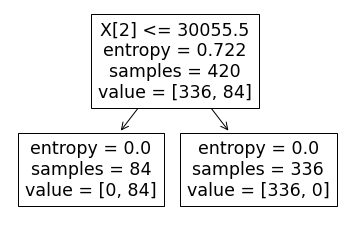

In [130]:
#PLot the decision tree
tree.plot_tree(model);

In [131]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

Good     140
Risky     40
dtype: int64

In [19]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
tax status,,
Good,143,0
Risky,0,37


In [20]:
# Accuracy 
np.mean(preds==y_test)*100

100.0

## Building Decision Tree Classifier (CART) using Gini Criteria

In [132]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [133]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [134]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)*100 

100.0